In [2]:
!pip install matplotlib -q

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.animation as animation
import glob
from matplotlib.animation import PillowWriter
import bilinear_mesh

In [84]:
nx=2048
ny=2048

output_name='sim_'+str(nx)+'_'+str(ny)
data_name = 'dustdens'
output_number='10'

archivo_x = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_x.dat'
archivo_y = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_y.dat'
archivo_data0 = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+'0.dat'
archivo_data = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+output_number+'.dat'

In [85]:
x = np.loadtxt(archivo_x)
y = np.loadtxt(archivo_y)

xmed = 0.5*(x[1:]+x[:-1])#phi
ymed = 0.5*(y[1:]+y[:-1])[3:-3] #r

X_MESH,Y_MESH = np.meshgrid(xmed,ymed)


data0 = np.fromfile(archivo_data0).reshape(ny,nx)
data = np.fromfile(archivo_data).reshape(ny,nx)


# GENERAL PLOT

/tmp/ipykernel_2890666/3163060274.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm1 = axs[0].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data))
/tmp/ipykernel_2890666/3163060274.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm2 = axs[1].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data/data0))


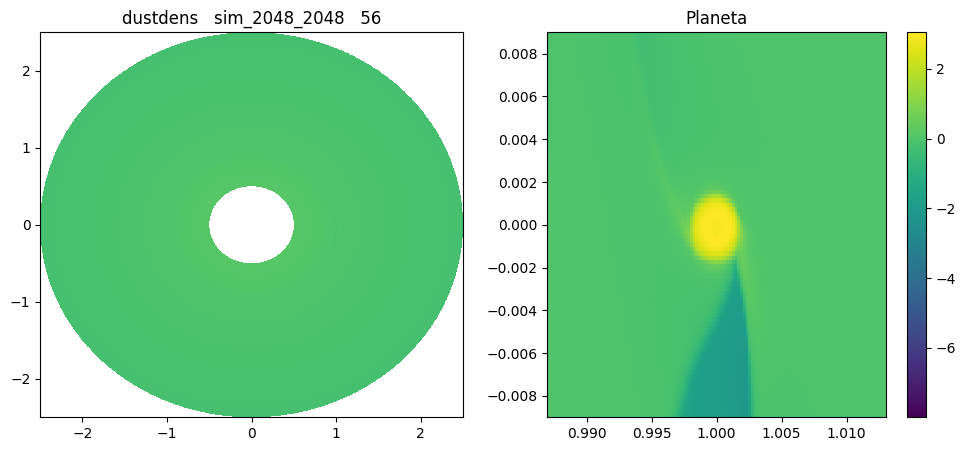

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Primer gráfico con pcolormesh
pcm1 = axs[0].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data))
#axs[0].set_xlim(-1,1)
#axs[0].set_ylim(-1,1)
axs[0].set_title(data_name+'   '+output_name+'   '+output_number)

# Segundo gráfico con pcolormesh
pcm2 = axs[1].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data/data0))
fig.colorbar(pcm2, ax=axs[1])
axs[1].set_xlim(1.0-0.013,1+0.013)
axs[1].set_ylim(-0.009,0.009)
axs[1].set_title('Planeta')
plt.savefig('/home/fangulo/plots/'+output_name+'_'+data_name+'.png')

# MASS FLUX

In [86]:
#sin conversion
vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustvx'+output_number+'.dat').reshape(ny,nx)
vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustvy'+output_number+'.dat').reshape(ny,nx)
dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+output_number+'.dat').reshape(ny,nx)

x_dp = Y_MESH*np.cos(X_MESH)-1
y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)

In [87]:
v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet

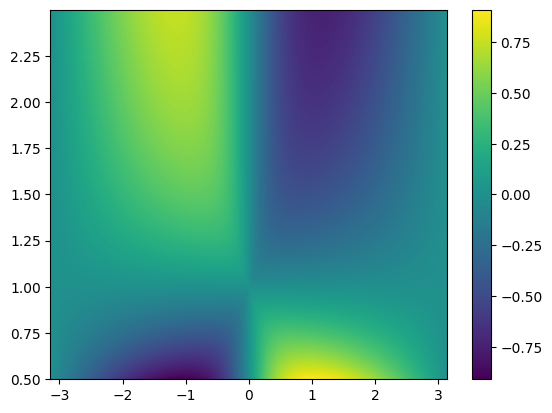

In [79]:
plt.pcolormesh(X_MESH, Y_MESH, vr_p )
plt.colorbar()

In [88]:
# Suponiendo ny, nx definidos
r = np.linspace(0, 0.13/2, ny)
theta = ymed  # debe tener dimensión (nx,)

# Crear mallas polares
R, Theta = np.meshgrid(r, theta, indexing='ij')  # R.shape = (ny, nx)

# Convertir a cartesianas
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Crear array (ny, nx, 2) con vectores [x, y]
pos_vector = np.stack((X, Y), axis=-1)  # dtype=float64



31.484950339810688


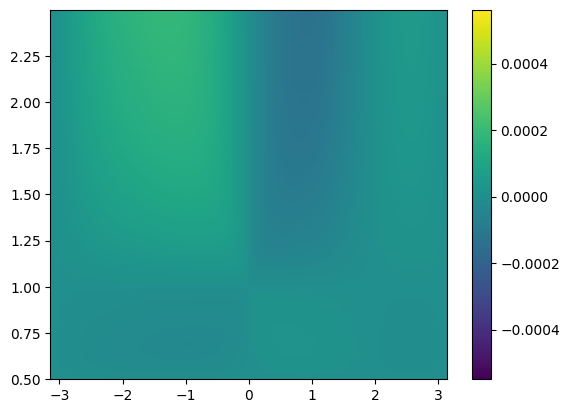

In [91]:
mass_flux = vr_p * dens * pos_vector[:,:,0]
imRHO, extent, new_p, new_r = bilinear_mesh.get_polar(0., 0.15, -np.pi, np.pi, ymed, xmed , mass_flux, 2048,2048)

print(np.sum(mass_flux))

plt.pcolormesh(X_MESH, Y_MESH,mass_flux)
plt.colorbar()

The above has to convergue to the below

array([  1.25663706,   1.88495559,   2.51327412,   3.14159265,
         3.76991118,   4.39822972,   5.02654825,   5.65486678,
         6.28318531,   6.91150384,   7.53982237,   8.1681409 ,
         8.79645943,   9.42477796,  10.05309649,  10.68141502,
        11.30973355,  11.93805208,  12.56637061,  13.19468915,
        13.82300768,  14.45132621,  15.07964474,  15.70796327,
        16.3362818 ,  16.96460033,  17.59291886,  18.22123739,
        18.84955592,  19.47787445,  20.10619298,  20.73451151,
        21.36283004,  21.99114858,  22.61946711,  23.24778564,
        23.87610417,  24.5044227 ,  25.13274123,  25.76105976,
        26.38937829,  27.01769682,  27.64601535,  28.27433388,
        28.90265241,  29.53097094,  30.15928947,  30.78760801,
        31.41592654,  32.04424507,  32.6725636 ,  33.30088213,
        33.92920066,  34.55751919,  35.18583772,  35.81415625,
        36.44247478,  37.07079331,  37.69911184,  38.32743037,
        38.9557489 ,  39.58406744,  40.21238597,  40.84

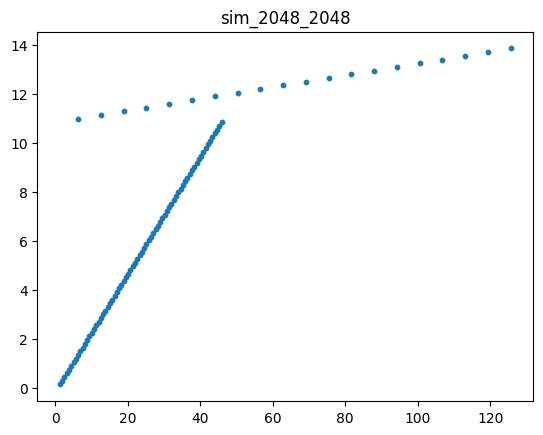

In [101]:
fluid = 'dust' #gas or dust
archivo_mass = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/monitor/'+fluid+'/mass.dat'

time_list = []
mass_list = []

total_mass = 0

with open(archivo_mass, "r") as archivo:
    for linea in archivo:
        time_i, mass_i = linea.strip().split()
        time_i = float(time_i)
        mass_i = float(mass_i)
        total_mass += mass_i
        time_list.append(float(time_i))
        mass_list.append(total_mass)

time = np.array(time_list)
mass = np.array(mass_list)

plt.scatter(time,mass, s=10)
plt.title(output_name)

time

# RESOLUTION PLOT

La mayor cantidad de celdas: 16.519971559533914


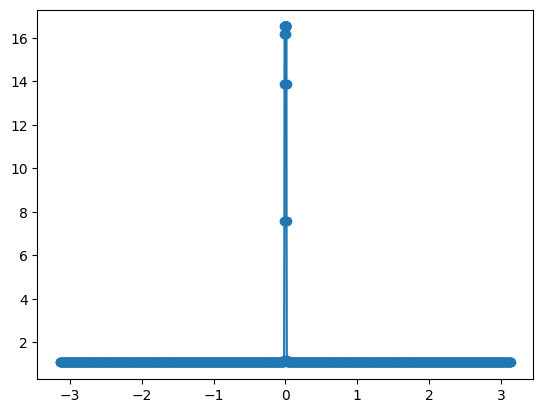

In [ ]:
coord = x #x:phi, y:r
array = (0.007/(coord[1:]-coord[:-1]))
plt.plot(0.5*(coord[1:]+coord[:-1]),(0.007/(coord[1:]-coord[:-1])), '-o')
print('La mayor cantidad de celdas: '+str(np.max(array)))

np.float64(15.978977793813968)

# ANIMATION

/tmp/ipykernel_2890666/1340899875.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh1 = ax1.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
/tmp/ipykernel_2890666/1340899875.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh2 = ax2.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))


Guardada con el nombre: sim_2048_2048_dustdens.gif


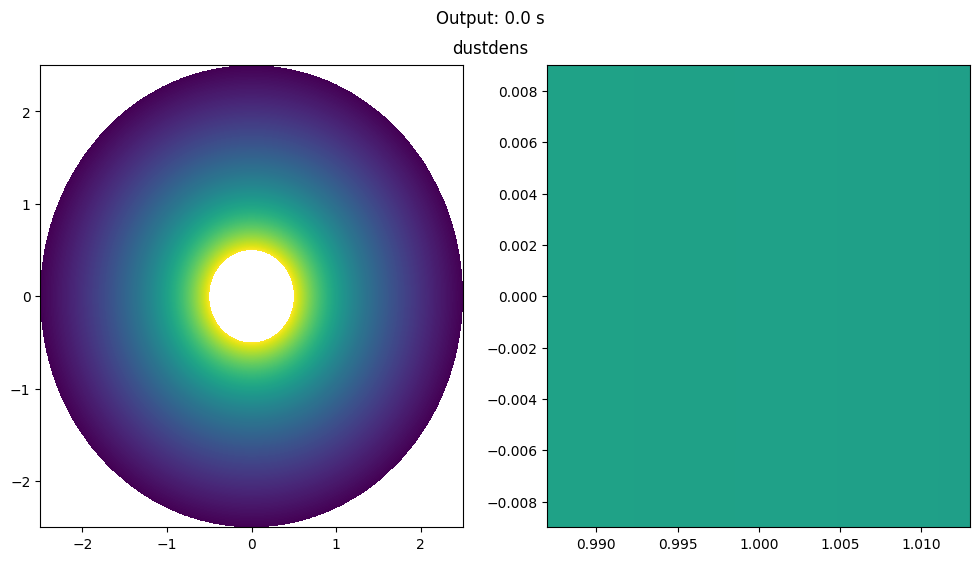

In [ ]:
archivos = []
for i in range(int(output_number)+1):
    archivo = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+str(i)+'.dat'
    archivos.append(archivo)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
mesh1 = ax1.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
mesh2 = ax2.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
ax2.set_xlim(1.0-0.013,1+0.013)
ax2.set_ylim(-0.009,0.009)

texto_tiempo = fig.text(0.5, 0.95, '', ha='center', fontsize=12)
texto_data = fig.text(0.5, 0.90, data_name, ha='center', fontsize=12)

def actualizar(frame):
    data = np.fromfile(archivos[frame]).reshape(ny, nx)
    log_data = np.log10(data)

    # Actualizar los dos meshes con la misma data
    mesh1.set_array(log_data.ravel())
    mesh2.set_array(log_data.ravel())

    texto_tiempo.set_text(f"Output: {frame:.1f} s")

    return mesh1, mesh2, texto_tiempo

# Crear animación
ani = animation.FuncAnimation(fig, actualizar, frames=range(int(output_number)+1), interval=4000, blit=False)


writer = PillowWriter(fps=5, metadata={'loop': 0})
ani.save('/home/fangulo/plots/'+output_name+'_'+data_name+'.gif',  writer=writer)

print('Guardada con el nombre: '+output_name+'_'+data_name+'.gif')
